# Titanic Survival Prediction - Task 1

## Project Overview
This project predicts whether a passenger survived the Titanic disaster using passenger-related features such as age, gender, and ticket class.

## Objective
- Perform data preprocessing
- Build a classification model
- Predict survival outcomes
- Evaluate model performance


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv("D:/Users/Home/Downloads/dataset/Titanic-Dataset.csv")
data.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
data['Survived'].value_counts()

#from this i got to know that less are survived more died

Survived
0    549
1    342
Name: count, dtype: int64

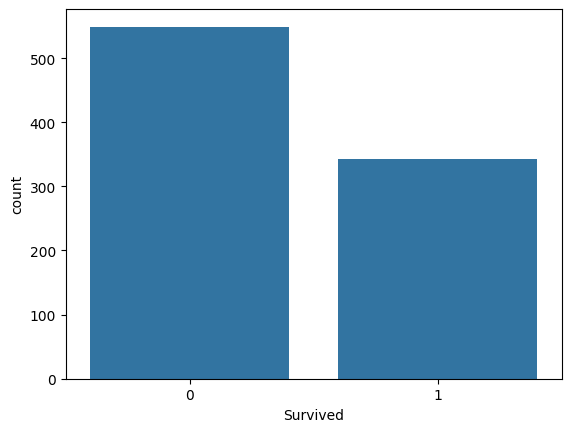

In [14]:
sns.countplot(x='Survived',data=data)
plt.show()

#over 500 + people have death and less then 400 survived

In [15]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

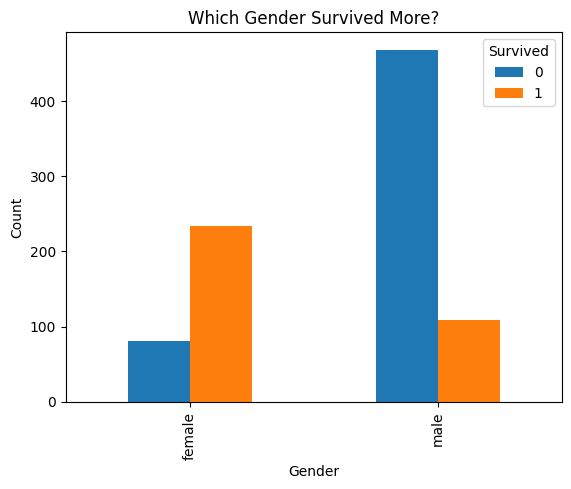

In [17]:
pd.crosstab(data.Sex, data.Survived).plot(kind='bar',)
plt.title('Which Gender Survived More?')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()
#by this chart we can understnad that female survived a lot than males 

In [18]:
X=data[['Pclass']]
y=data['Survived']

## Model Training
A classification model is trained to predict passenger survival based on selected features.


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [21]:
lr.fit(X_train,y_train)

LogisticRegression()

In [22]:
lr.score(X_test,y_test)

0.659217877094972

In [23]:
pred_test = lr.predict(X_test)
pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0])

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_test)
print(cm)

[[96 15]
 [46 22]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       111
           1       0.59      0.32      0.42        68

    accuracy                           0.66       179
   macro avg       0.64      0.59      0.59       179
weighted avg       0.65      0.66      0.63       179



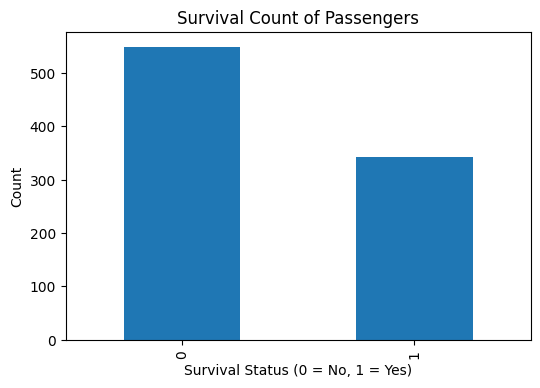

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
data['Survived'].value_counts().plot(kind='bar')
plt.xlabel("Survival Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Survival Count of Passengers")
plt.show()


## Conclusion
The project demonstrates how machine learning classification techniques can be applied to predict survival outcomes using historical data.
